In [8]:
import tensorflow as tf

import explainer  # custom library
import utils  # custom library

from amm import AMMGenerator

FILE_TRAIN = "dataset/insdn/train.csv"
FILE_TEST = "dataset/insdn/test.csv"
FRACTION = [0.2, 0.4, 0.6, 0.8]

(x_train, y_train) = utils.getDataFraction(FILE_TRAIN, 0.5) 

In [2]:
mlp = tf.keras.models.load_model(f'dataset/insdn/phase1/mlp', compile=False)
utils.compile(mlp)
cnn = tf.keras.models.load_model(f'dataset/insdn/model/cnn_4layer', compile=False)
utils.compile(cnn)

2024-06-26 01:30:46.471631: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-06-26 01:30:46.471700: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-06-26 01:30:46.471733: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (v1ppr0): /proc/driver/nvidia/version does not exist
2024-06-26 01:30:46.472123: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/trung/.pyenv/versions/3.9.10/envs/dgx/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: U

In [4]:
%%time
# Calculate + Save shap_values (IMPORTANT)
print("\n### CALCULATE SHAP_VALUES ###")
shap_values = explainer.calculateSHAP(mlp, x_train)
with open("dataset/insdn/defense/mlp_shap", "wb") as file:
  pickle.dump(shap_values, file)


### CALCULATE SHAP_VALUES ###


/home/trung/.pyenv/versions/3.9.10/envs/dgx/lib/python3.9/site-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/home/trung/.pyenv/versions/3.9.10/envs/dgx/lib/python3.9/site-packages/keras/backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


CPU times: user 11min 45s, sys: 1min 2s, total: 12min 47s
Wall time: 7min 33s


In [3]:
%%time
# Calculate + Save shap_values (IMPORTANT)
print("\n### CALCULATE SHAP_VALUES ###")
shap_values = explainer.calculateSHAP(cnn, x_train)
with open("dataset/insdn/defense/cnn_shap", "wb") as file:
  pickle.dump(shap_values, file)


### CALCULATE SHAP_VALUES ###


/home/trung/.pyenv/versions/3.9.10/envs/dgx/lib/python3.9/site-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/home/trung/.pyenv/versions/3.9.10/envs/dgx/lib/python3.9/site-packages/keras/backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


CPU times: user 1h 34min 4s, sys: 6min 5s, total: 1h 40min 9s
Wall time: 45min 48s


## **Visualize AMM**

In [1]:
import utils
import shap
import explainer
import tensorflow as tf

from amm import AMMGenerator

FILE_TRAIN = "dataset/insdn/train.csv"
FILE_TEST = "dataset/insdn/test.csv"
shap.initjs()

(x_train, y_train) = utils.getData(FILE_TRAIN)

mlp = tf.keras.models.load_model(f'dataset/insdn/phase1/mlp', compile=False)
utils.compile(mlp)
shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.passthrough
explain = shap.DeepExplainer(mlp, data=shap.utils.sample(x_train.to_numpy(), 500))
shap_values = explainer.loadShap("dataset/insdn/phase1/mlp_shap")


2024-06-28 21:12:10.837599: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-28 21:12:12.471962: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-06-28 21:12:12.471997: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-06-28 21:12:12.623187: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-28 21:12:15.922176: W tensorflow/stream_executor/platform/de

2024-06-28 21:12:25.405422: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-06-28 21:12:25.409100: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-06-28 21:12:25.409173: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (v1ppr0): /proc/driver/nvidia/version does not exist
2024-06-28 21:12:25.414569: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/trung/.pyenv/versions/3.9.10/envs/dgx/lib/python3.9/site-packages/shap/explainers/_deep/deep_tf.py:99: UserWar

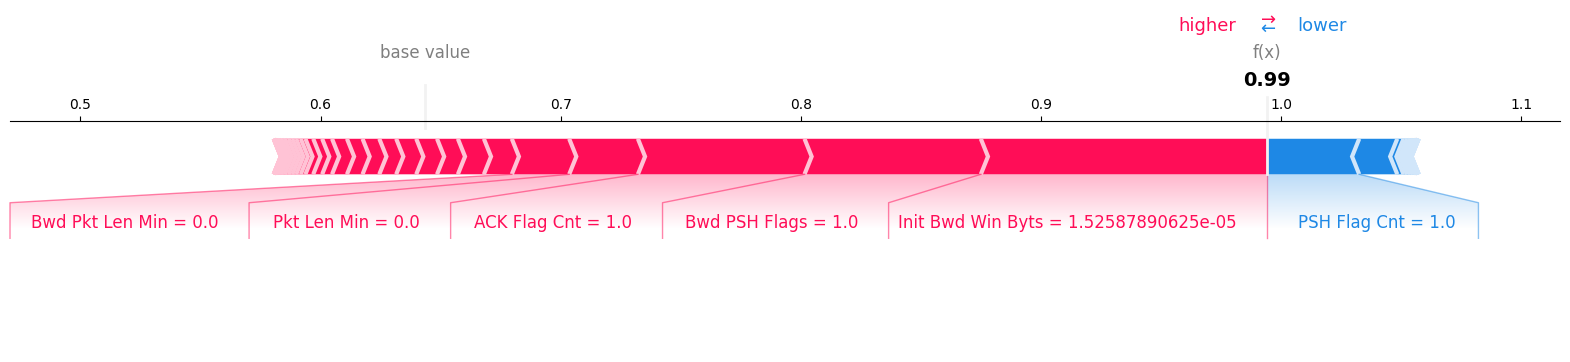

In [3]:
shap.plots.force(
  0.6436997, shap_values[0,:,0], x_train.iloc[0, :], matplotlib=True
)

In [4]:
generator = AMMGenerator()
x_amm = generator.manipulateFeature("dataset/insdn/phase1/mlp_amm.json", x_train, y_train)
shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.passthrough
explain = shap.DeepExplainer(mlp, data=shap.utils.sample(x_amm.to_numpy(), 500))
shap_values = explain.shap_values(x_amm.to_numpy())

/home/trung/.pyenv/versions/3.9.10/envs/dgx/lib/python3.9/site-packages/keras/backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


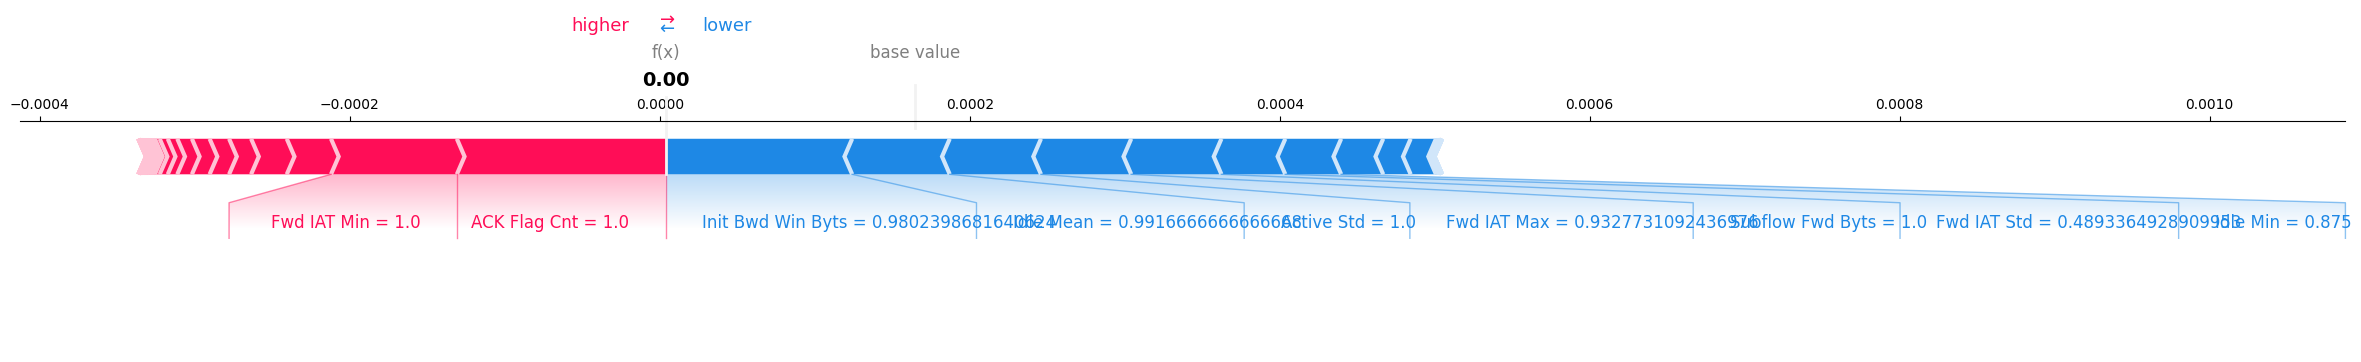

In [41]:
shap.initjs()
shap.plots.force(
  0.00016448, shap_values[0,:,0], x_amm.iloc[0, :], matplotlib=True, figsize=(30,3)
)